In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [6]:
# Load the dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names
target_names = cancer.target_names

cancer


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target'] = df['target'].map({0: target_names[0], 1: target_names[1]})
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


In [11]:
# Display basic information
print("Dataset shape:", X.shape)
print("\nFeature names:", feature_names)
print("\nTarget names:", target_names)
print("\nClass distribution:")
print(df['target'].value_counts())

Dataset shape: (569, 30)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target names: ['malignant' 'benign']

Class distribution:
target
benign       357
malignant    212
Name: count, dtype: int64


In [12]:
# Check for missing values
print("\nMissing values in each feature:")
print(df.isnull().sum())


Missing values in each feature:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFirst 5 rows of scaled training data:")
print(pd.DataFrame(X_train_scaled, columns=feature_names).head())


First 5 rows of scaled training data:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0    -1.440753     -0.435319       -1.362085  -1.139118         0.780573   
1     1.974096      1.733026        2.091672   1.851973         1.319843   
2    -1.399982     -1.249622       -1.345209  -1.109785        -1.332645   
3    -0.981797      1.416222       -0.982587  -0.866944         0.059390   
4    -1.117700     -1.010259       -1.125002  -0.965942         1.269511   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.718921        2.823135            -0.119150       1.092662   
1          3.426275        2.013112             2.665032       2.127004   
2         -0.307355       -0.365558            -0.696502       1.930333   
3         -0.596788       -0.820203            -0.845115       0.313264   
4         -0.439002       -0.983341            -0.930600       3.394436   

   mean fractal dimension  ...  worst radius  worst t

Preprocessing Statement:
The dataset had no missing values, so no imputation was needed. We applied StandardScaler to normalize features by removing the mean and scaling to unit variance, ensuring fair comparison across algorithms. Scaling is critical for distance-based models (e.g., SVM, k-NN) and gradient-descent optimizers (e.g., logistic regression) to perform effectively.

# 2. Classification Algorithm Implementation

## 2.1 Logistic Regression

In [16]:
# Initialize and train the model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression Performance:
Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791

Confusion Matrix:
[[41  2]
 [ 1 70]]


Logistic Regression is a linear model for classification that predicts probabilities using a logistic function. It's suitable here because:

It works well for binary classification problems

It's computationally efficient and provides probabilistic interpretations

The relationship between features and target might be approximately linear

## 2.2 Decision Tree Classifier

In [17]:
# Initialize and train the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)  # Decision trees don't require feature scaling

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate
print("\nDecision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Performance:
Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1 Score: 0.9577464788732394

Confusion Matrix:
[[40  3]
 [ 3 68]]


Decision Trees split the data based on feature values to create a tree-like model. Suitable because:

They can handle both numerical and categorical data

They model non-linear relationships well

They're interpretable and can show which features are most important

## 2.3 Random Forest Classifier

In [18]:
# Initialize and train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # Random Forests also don't require feature scaling

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222

Confusion Matrix:
[[40  3]
 [ 1 70]]


Random Forest is an ensemble of decision trees that reduces overfitting. Suitable because:

It generally provides better accuracy than single decision trees

It can handle high dimensional data well

It provides feature importance metrics

It's robust to outliers and noise

## 2.4 Support Vector Machine (SVM)

In [19]:
# Initialize and train the model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test_scaled)

# Evaluate
print("\nSVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM Performance:
Accuracy: 0.956140350877193
Precision: 0.9714285714285714
Recall: 0.9577464788732394
F1 Score: 0.9645390070921985

Confusion Matrix:
[[41  2]
 [ 3 68]]


SVM finds the optimal hyperplane that separates classes with maximum margin. Suitable because:

It works well for high-dimensional data (many features)

It's effective when there's a clear margin of separation

The linear kernel works well for this dataset (as features are likely linearly separable)

## 2.5 k-Nearest Neighbors (k-NN)

In [21]:
# Initialize and train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate
print("\nk-NN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


k-NN Performance:
Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1 Score: 0.9577464788732394

Confusion Matrix:
[[40  3]
 [ 3 68]]


k-NN classifies samples based on the majority class among their k nearest neighbors. Suitable because:

It's simple and effective for small to medium-sized datasets

It can model complex decision boundaries

It works well when similar samples tend to have the same class (likely true for medical data)

## 3. Model Comparison

In [25]:
# Create a comparison table
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'k-NN']
accuracy = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt),
            accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm),
            accuracy_score(y_test, y_pred_knn)]
precision = [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_dt),
             precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_svm),
             precision_score(y_test, y_pred_knn)]
recall = [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_dt),
          recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_svm),
          recall_score(y_test, y_pred_knn)]
f1 = [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_dt),
      f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_svm),
      f1_score(y_test, y_pred_knn)]

comparison = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'Precision': precision,
                          'Recall': recall, 'F1 Score': f1})
comparison = comparison.sort_values(by='Accuracy', ascending=False)
comparison = comparison.reset_index(drop=True)

print("Model Comparison:")
print(comparison)



Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.973684   0.972222  0.985915  0.979021
1        Random Forest  0.964912   0.958904  0.985915  0.972222
2                  SVM  0.956140   0.971429  0.957746  0.964539
3        Decision Tree  0.947368   0.957746  0.957746  0.957746
4                 k-NN  0.947368   0.957746  0.957746  0.957746


C:\Users\HP\AppData\Local\Temp\ipykernel_26832\3544462584.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=comparison, palette='viridis')


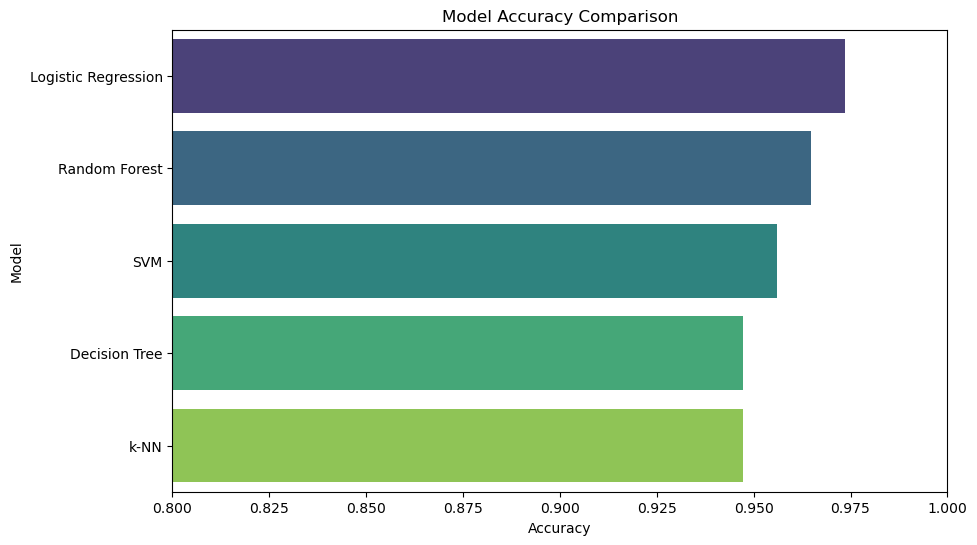

In [24]:
# Visual comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=comparison, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlim(0.8, 1.0)
plt.show()